## Imports

In [1]:
# for colab run
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir("/content/drive/MyDrive/projeto/automl-dynamic-search-space/analysis/meta-feature-analysis/")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = 7, 4


In [3]:
# COLORS = ["#333333", "#999ea2", "#6fa2d0", "#4d759a", "#073763"][::-1]
# COLORS = ["#1B262C", "#0F4C75", "#3282B8", "#BBE1FA"]
COLORS = ["#000057", "#4d759a", "#3282B8",  "#999ea2", "#4f4f4f", "#1B262C"]

MY_PALLETE = sns.color_palette("colorblind")
sns.set_palette(MY_PALLETE)

In [4]:
MY_PALLETE

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [5]:
def save_pdf(name, g, extention=".pdf", path="./"):
  g.savefig(path+name+extention)

## Meta feature Time Spent

In [6]:
df_mtf_info = pd.read_csv("meta_feature_info.csv")
df_mtf_time = pd.read_csv("meta_feature_time_spent.csv")
df_datasets = pd.read_csv("datasets_meta_data.csv", index_col=0)\
    .rename(columns={
        "Number of Examples": "number of examples",
        "Number of Features": "number of features",
        "Number of class": "number of classes",
        "Minority Class %": "minority class (%)"
    })
df_datasets["dataset"] = ["dataset_"+str(i) for i in df_datasets["OpenML ID"]]


df_mtf_time = df_mtf_time[df_mtf_time["dataset"].isin(df_datasets["dataset"])] # only with meta feature and pipelines

In [7]:
df_datasets

,OpenML ID,number of examples,number of features,Number of Categorical Features,number of classes,Majority Class %,minority class (%),dataset
132,2,898,38,32,5,76.17,0.00,dataset_2
25,6,20000,16,0,26,4.07,3.67,dataset_6
44,11,625,4,0,3,46.08,7.84,dataset_11
147,15,699,9,0,2,65.52,34.48,dataset_15
169,23,1473,9,7,3,42.70,22.61,dataset_23
...,...,...,...,...,...,...,...,...
206,41991,270912,784,0,49,2.58,0.17,dataset_41991
188,42193,5278,13,6,2,52.96,47.04,dataset_42193
159,42206,595212,37,25,2,96.36,3.64,dataset_42206
168,42343,82318,477,136,2,88.23,11.77,dataset_42343


In [8]:
df_mtf_time

,attr_conc.mean,attr_conc.sd,attr_ent.mean,attr_ent.sd,attr_to_inst,best_node.mean,best_node.sd,can_cor.mean,can_cor.sd,cat_to_num,...,tree_shape.mean,tree_shape.sd,var.mean,var.sd,var_importance.mean,var_importance.sd,w_lambda,worst_node.mean,worst_node.sd,dataset
0,0.098842,0.098920,0.000030,0.000081,0.000005,1.049791,1.049883,0.000034,0.000123,0.000004,...,0.000054,0.000224,0.000511,0.000568,0.001559,0.001613,0.000069,0.953642,0.953732,dataset_40985
3,2.771118,2.771199,0.000031,0.000087,0.000005,0.131854,0.131941,0.000036,0.000131,0.000004,...,0.000029,0.000086,0.001718,0.001785,0.000120,0.000177,0.000057,0.040586,0.040656,dataset_1501
4,2.028396,2.028437,0.000026,0.000058,0.000003,0.139965,0.140008,0.000028,0.000004,0.000003,...,0.000023,0.000055,0.000424,0.000456,0.000083,0.000113,0.000031,0.021184,0.021225,dataset_1479
5,0.120289,0.120351,0.000022,0.000061,0.000004,0.027516,0.027578,0.000027,0.000089,0.000003,...,0.000028,0.000078,0.000152,0.000201,0.000129,0.000177,0.000046,0.025729,0.025787,dataset_1530
6,1.059212,1.059265,0.000021,0.000060,0.000003,0.022445,0.022494,0.000025,0.000003,0.000003,...,0.000021,0.000054,0.000187,0.000224,0.000075,0.000109,0.000027,0.020547,0.020599,dataset_40680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,1.864333,1.864394,0.000023,0.000068,0.000003,0.175613,0.175668,0.000025,0.000083,0.000003,...,0.000021,0.000055,0.002235,0.002286,0.000091,0.000138,0.000037,0.014894,0.014939,dataset_1515
221,1.012900,1.012936,0.000024,0.000056,0.000003,0.163259,0.163304,0.000041,0.000004,0.000003,...,0.000025,0.000058,0.000255,0.000301,0.000099,0.000140,0.000037,0.102543,0.102588,dataset_816
222,2.740597,2.740653,0.000023,0.000070,0.000003,0.154068,0.154129,0.000026,0.000099,0.000003,...,0.000021,0.000056,0.000507,0.000551,0.000084,0.000119,0.000036,0.064771,0.064825,dataset_1497
224,3.313771,3.313843,0.000032,0.000098,0.000005,0.042543,0.042623,0.000041,0.000130,0.000005,...,0.000034,0.000094,0.000294,0.000348,0.000188,0.000246,0.000050,0.035489,0.035558,dataset_1552


In [9]:
df_mtf_info

,meta-feature,summary,group,full-name
0,attr_conc,mean,info-theory,attr_conc.mean
1,attr_conc,sd,info-theory,attr_conc.sd
2,attr_ent,mean,info-theory,attr_ent.mean
3,attr_ent,sd,info-theory,attr_ent.sd
4,attr_to_inst,NaN,general,attr_to_inst
...,...,...,...,...
106,var_importance,mean,model-based,var_importance.mean
107,var_importance,sd,model-based,var_importance.sd
108,w_lambda,NaN,statistical,w_lambda
109,worst_node,mean,landmarking,worst_node.mean


In [10]:
## joining and agg meta info
df_mtf_time_agg = df_mtf_time.T
df_mtf_time_agg.columns = df_mtf_time_agg.loc["dataset"]
df_mtf_time_agg = df_mtf_time_agg.reset_index().rename(columns={"index": "full-name"})
df_mtf_time_agg = df_mtf_info.merge(df_mtf_time_agg, how="inner", on="full-name")
df_mtf_time_agg = df_mtf_time_agg.groupby(["group", "meta-feature"]).sum().reset_index().drop(columns=["summary", "full-name"])
df_mtf_time_agg = df_mtf_time_agg.melt(
    id_vars=["meta-feature", "group"],
    var_name="dataset",
    value_name="time"
).replace(0, np.nan).dropna() # remove meta-features that were not computed
df_mtf_time_agg["time_log10"] = np.log10(df_mtf_time_agg["time"].values.astype(float)) # apply log10()
df_mtf_time_agg = df_mtf_time_agg.merge( #sort by group index
    df_mtf_time_agg.groupby(["group"])["time"].median().to_frame("sort-group").reset_index(), how="inner", on="group")
df_mtf_time_agg = df_mtf_time_agg.merge( #sort by group index
    df_mtf_time_agg.groupby(["meta-feature"])["time"].median().to_frame("sort-meta-feature").reset_index(), how="inner", on="meta-feature")
df_mtf_time_agg

<ipython-input-10-12a793dcb259>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ).replace(0, np.nan).dropna() # remove meta-features that were not computed


,meta-feature,group,dataset,time,time_log10,sort-group,sort-meta-feature
0,attr_to_inst,general,dataset_40985,0.000005,-5.280237,0.000003,0.000004
1,cat_to_num,general,dataset_40985,0.000004,-5.367387,0.000003,0.000004
2,freq_class,general,dataset_40985,0.000144,-3.842343,0.000003,0.000128
3,inst_to_attr,general,dataset_40985,0.000004,-5.367387,0.000003,0.000004
4,nr_attr,general,dataset_40985,0.000003,-5.581267,0.000003,0.000002
...,...,...,...,...,...,...,...
13476,skewness,statistical,dataset_1161,8.764549,0.942730,0.000781,0.036262
13477,sparsity,statistical,dataset_1161,1.999084,0.300831,0.000781,0.015386
13478,t_mean,statistical,dataset_1161,0.647334,-0.188872,0.000781,0.002891
13479,var,statistical,dataset_1161,0.190439,-0.720245,0.000781,0.000931


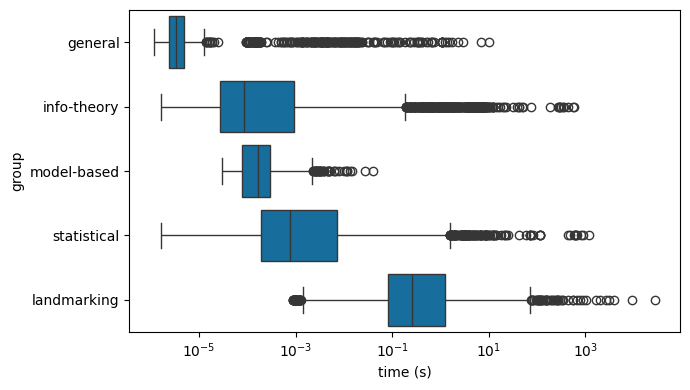

In [11]:
g = sns.boxplot(
    data=df_mtf_time_agg.sort_values(by="sort-group"),
    x="time",
    y="group",
    log_scale=True
)
g.set(xlabel='time (s)')
plt.tight_layout()
save_pdf("boxplot-meta-feature-time-spent", g.figure, extention=".pdf", path="./")

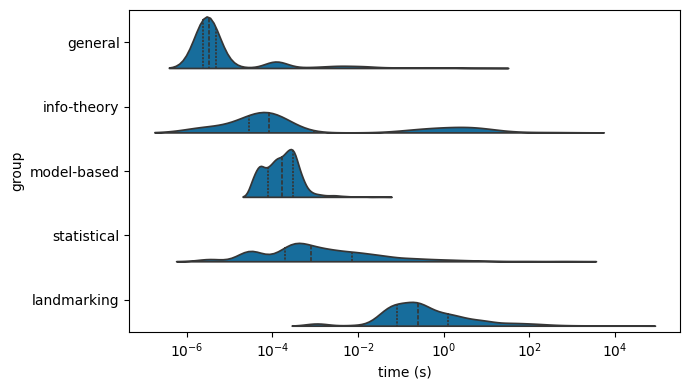

In [12]:
g = sns.violinplot(
    data=df_mtf_time_agg.sort_values(by="sort-group"),
    y="group",
    x="time",
    split=True,
    inner="quart",
    log_scale=True,

)
g.set(xlabel='time (s)')
plt.tight_layout()
save_pdf("violinplot-meta-feature-time-spent", g.figure, extention=".pdf", path="./")

In [13]:
n=5
time_spent = df_mtf_time_agg.groupby(["meta-feature"])["sort-meta-feature"].max().sort_values()
top_10_fast = time_spent[0:n]
top_10_fast_idx = df_mtf_time_agg["meta-feature"].isin(top_10_fast.index)
top_10_slow = time_spent[-n:]
top_10_slow_idx = df_mtf_time_agg["meta-feature"].isin(top_10_slow.index)

In [14]:
top_10_fast

,sort-meta-feature
meta-feature,
nr_attr,0.000002
class_ent,0.000003
num_to_cat,0.000003
nr_inst,0.000003
nr_class,0.000003


In [15]:
top_10_slow

,sort-meta-feature
meta-feature,
elite_nn,0.446217
linear_discr,0.501538
class_conc,0.781539
one_nn,1.325527
attr_conc,4.314818


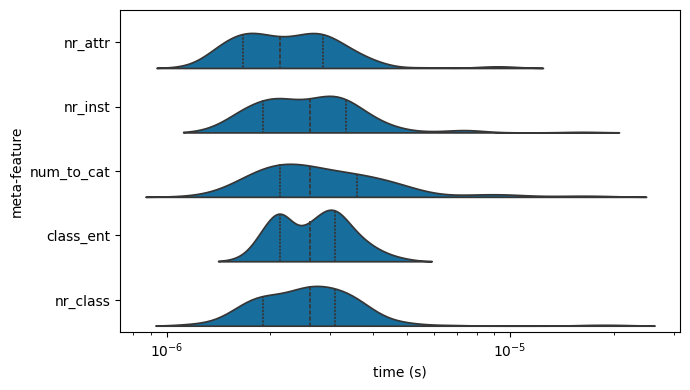

In [16]:
g = sns.violinplot(
    data=df_mtf_time_agg[top_10_fast_idx].sort_values(by="sort-meta-feature"),
    y="meta-feature",
    x="time",
    split=True,
    inner="quart",
    log_scale=True,
)
g.set(xlabel='time (s)')
plt.tight_layout()
save_pdf("violinplot-meta-feature-time-spent-top-fast", g.figure, extention=".pdf", path="./")

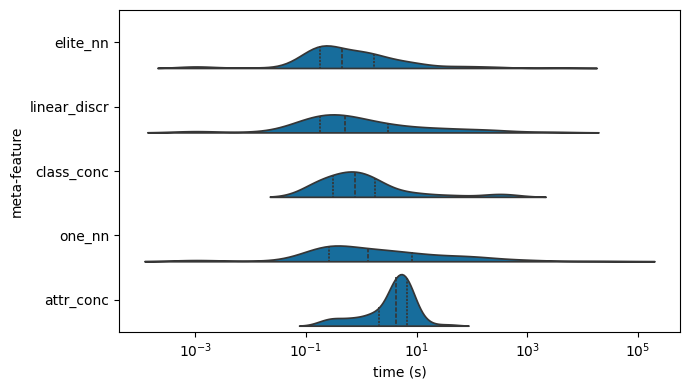

In [17]:
g = sns.violinplot(
    data=df_mtf_time_agg[top_10_slow_idx].sort_values(by="sort-meta-feature"),
    y="meta-feature",
    x="time",
    split=True,
    inner="quart",
    log_scale=True,

)
g.set(xlabel='time (s)')
plt.tight_layout()
save_pdf("violinplot-meta-feature-time-spent-top-slow", g.figure, extention=".pdf", path="./")

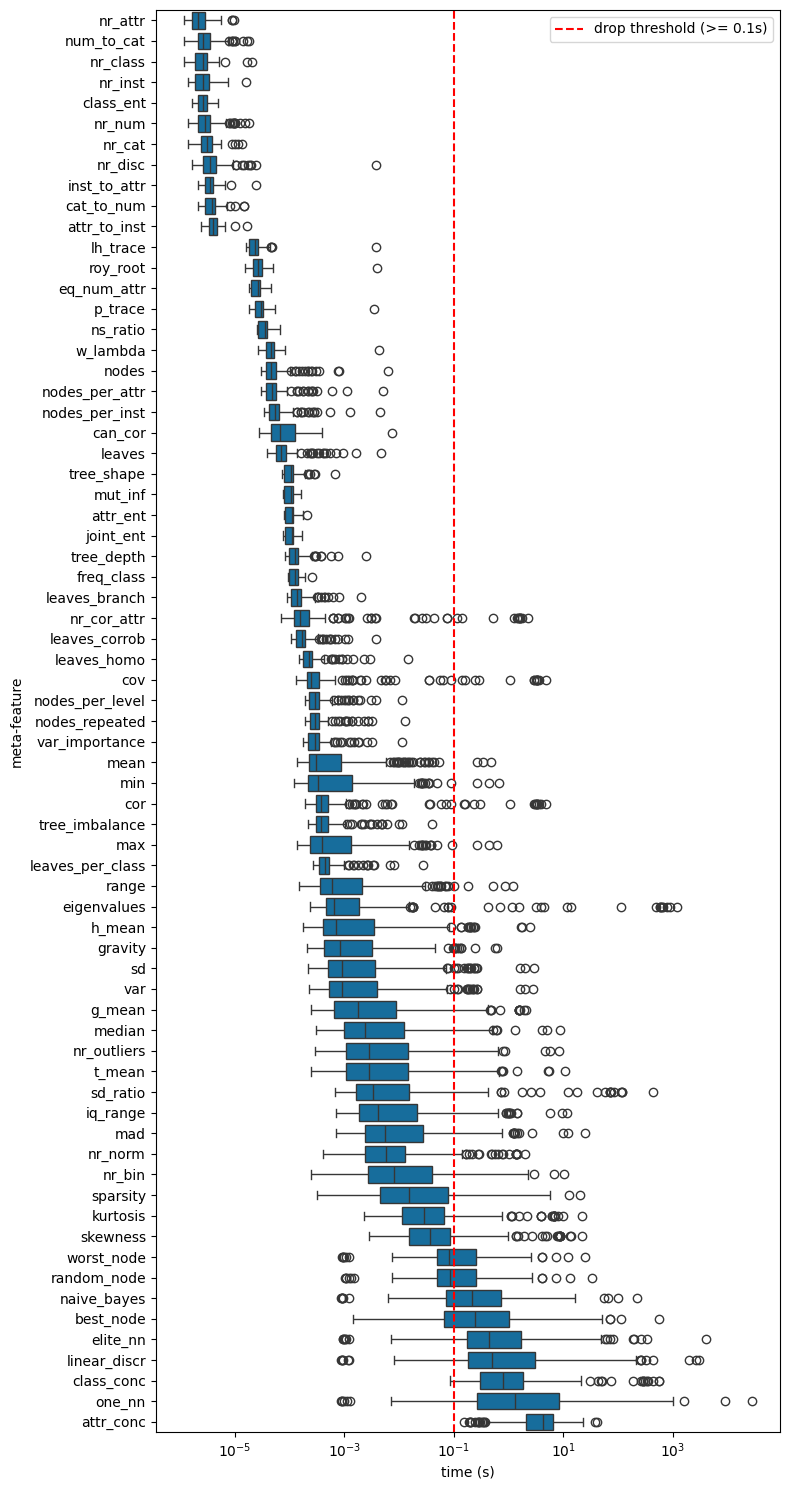

In [18]:
plt.figure(figsize=(8,15))

g = sns.boxplot(
    data=df_mtf_time_agg.sort_values(by="sort-meta-feature"),
    y="meta-feature",
    x="time",
    # split=True,
    # inner="quart",
    log_scale=True,

)
plt.axvline(x=0.1, ymin=0, ymax=1, color="red", linestyle="dashed", label="drop threshold (>= 0.1s)")
g.set(xlabel='time (s)')
plt.legend()
plt.tight_layout()
save_pdf("boxplot-meta-feature-time-spent-all", g.figure, extention=".pdf", path="./")

In [19]:
## joining and agg meta info

df_mtf_time_agg = df_mtf_time.T
df_mtf_time_agg.columns = df_mtf_time_agg.loc["dataset"]
df_mtf_time_agg = df_mtf_time_agg.reset_index().rename(columns={"index": "full-name"})
df_mtf_time_agg = df_mtf_info.merge(df_mtf_time_agg, how="inner", on="full-name")
df_mtf_time_agg = df_mtf_time_agg.groupby(["group"]).sum().reset_index().drop(columns=["summary", "full-name", "meta-feature"]).T
df_mtf_time_agg.columns = df_mtf_time_agg.loc["group"]
df_mtf_time_agg = df_mtf_time_agg.iloc[1:].reset_index().rename(columns={"index": "dataset"})
df_mtf_time_agg

group,dataset,general,info-theory,landmarking,model-based,statistical
0,dataset_40985,0.008833,0.366358,32.81515,0.040466,0.111421
1,dataset_1501,0.016068,16.955942,8.286,0.002878,0.793021
2,dataset_1479,0.008234,6.484354,1.490271,0.002023,0.212631
3,dataset_1530,0.001822,0.348151,0.758099,0.002749,0.020608
4,dataset_40680,0.004643,2.353726,0.743196,0.001762,0.036929
...,...,...,...,...,...,...
192,dataset_1515,0.039774,53.964812,11.238565,0.001876,4.597303
193,dataset_816,0.004395,2.265294,4.034939,0.002541,0.047726
194,dataset_1497,0.006536,6.277631,4.040194,0.001895,0.098295
195,dataset_1552,0.008133,7.192168,1.201817,0.003345,0.072189


In [20]:
aux = df_datasets.copy()
df_mtf_time_all = aux\
    .merge(df_mtf_time_agg, how="inner", on="dataset")
df_mtf_time_all

,OpenML ID,number of examples,number of features,Number of Categorical Features,number of classes,Majority Class %,minority class (%),dataset,general,info-theory,landmarking,model-based,statistical
0,2,898,38,32,5,76.17,0.00,dataset_2,0.017237,7.336782,1.001833,0.002472,0.119827
1,6,20000,16,0,26,4.07,3.67,dataset_6,0.010927,9.745894,30.13693,0.004673,0.215877
2,11,625,4,0,3,46.08,7.84,dataset_11,0.000358,0.389493,0.397871,0.001818,0.012986
3,15,699,9,0,2,65.52,34.48,dataset_15,0.00088,3.582621,0.731579,0.00246,0.033406
4,23,1473,9,7,3,42.70,22.61,dataset_23,0.005521,2.030456,0.822193,0.002314,0.054132
...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,41671,20000,20,0,5,55.81,3.72,dataset_41671,0.024136,6.442212,24.081784,0.008344,0.318457
193,41972,9144,220,0,8,44.29,0.22,dataset_41972,0.099692,13.396035,24.712203,0.002373,1.227496
194,41989,51839,2916,0,43,5.79,0.52,dataset_41989,10.189235,272.310955,31253.316412,0.004516,143.751243
195,41990,51839,256,0,43,5.79,0.52,dataset_41990,0.539562,26.63832,641.320993,0.01287,5.654945


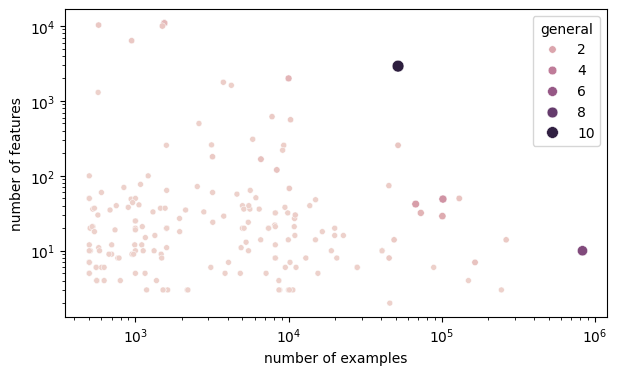

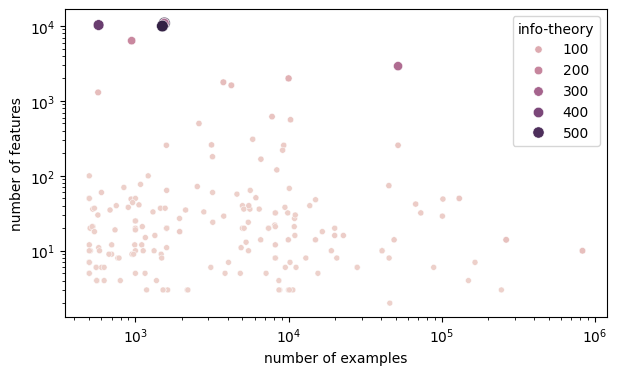

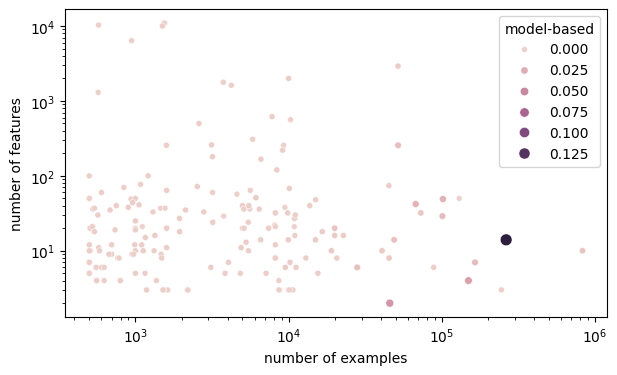

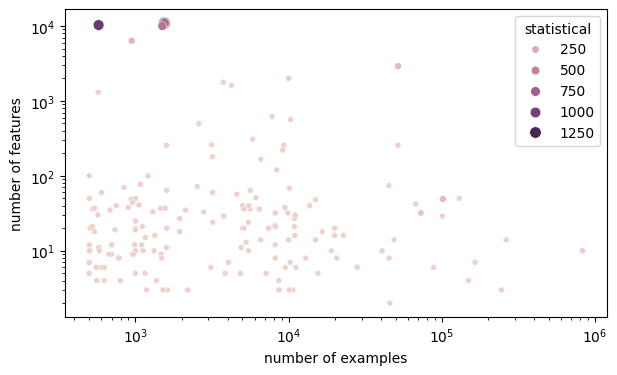

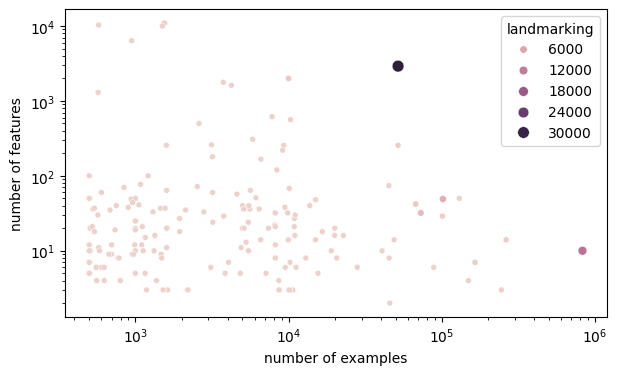

In [21]:
import matplotlib.pyplot as plt

for i in ["general", "info-theory", "model-based", "statistical", "landmarking"]:
    g = sns.scatterplot(data=df_mtf_time_all.dropna(),
                    x="number of examples",
                    y="number of features",
                    hue=i, size=i
    )
    plt.xscale('log')
    plt.yscale('log')
    plt.show()

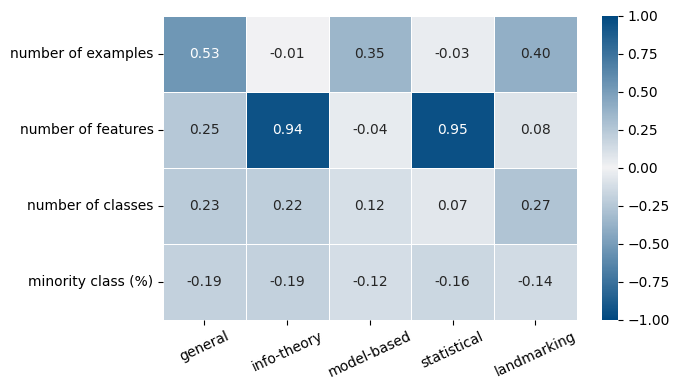

In [22]:
rows = ["number of examples", "number of features",	"number of classes", "minority class (%)"]
cols = ["general", "info-theory", "model-based", "statistical", "landmarking"]
corr = df_mtf_time_all[cols+rows].astype(float).corr(numeric_only=True)

cm = sns.diverging_palette(250, 250, s=100, l=30,as_cmap=True, center="light")

g = sns.heatmap(corr.loc[rows, cols], cmap=cm, annot=True, fmt=".2f", linewidth=.5, vmin=-1, vmax=1)
plt.xticks(rotation = 25)
plt.tight_layout()
save_pdf("correlation-meta-feature-dataset-characteristics", g.figure, extention=".pdf", path="./")